<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Homework6-%CE%95%CF%81%CE%B3%CE%B1%CF%84%CE%B9%CE%BA%CE%AC_%CE%B1%CF%84%CF%85%CF%87%CE%AE%CE%BC%CE%B1%CF%84%CE%B1/Homework6_Paraskevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Θα αναλύσουμε δεδομένα για εργατικά ατυχήματα που έχουν συμβεί στις ΗΠΑ. 
Το dataset είναι από εδώ: https://www.osha.gov/severeinjury/index.html

Σήμερα θα κάνετε μόνοι σας ανάλυση στα δεδομένα με βάση όσα έχετε μάθει μέχρι στιγμής! Για να μάθετε περισσότερα για τους κωδικούς των ατυχημάτων πρέπει να διαβάσετε το αντίστοιχο documentation ( https://www.bls.gov/iif/oshoiics.htm), αυτό είναι η πρακτική στις περισσότερες περιπτώσεις που παίρνουμε έτοιμα δεδομένα από κάποια υπηρεσία. 

🤪 Τι ήταν να το γράψεις αυτό; Τρελάθηκα στη μελέτη των δεδομένων 👽

### Εισαγωγή βιβλιοθηκών και δεδομένων

In [ ]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Εισαγωγή του csv σε dataframe με όνομα accidents
data = pd.read_csv("https://github.com/datajour-gr/Data_journalism/raw/master/week6/severeinjury.csv", encoding="latin-1")

### Μελέτη των δεδομένων

In [ ]:
# Επισκόπηση του αριθμού γραμμών και στηλών
data.shape

(21578, 26)

Θέλω να δω ποιες μεταβλητές έχω και τι είδους τιμές παίρνουν

In [ ]:
data.dtypes

ID                          int64
UPA                         int64
EventDate                  object
Employer                   object
Address1                   object
Address2                   object
City                       object
State                      object
Zip                       float64
Latitude                  float64
Longitude                 float64
Primary NAICS              object
Hospitalized              float64
Amputation                float64
Inspection                float64
Final Narrative            object
Nature                      int64
NatureTitle                object
Part of Body                int64
Part of Body Title         object
Event                       int64
EventTitle                 object
Source                      int64
SourceTitle                object
Secondary Source          float64
Secondary Source Title     object
dtype: object

In [ ]:
# Επισκόπηση της 1ης γραμμής του df
data.head(1)

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody


In [ ]:
# Επισκόπηση της τελευταίας γραμμής
data.tail(1)


,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
21577,2017021912,1187132,2/28/2017,"JV MANUFACTURING, INC.",701 Butterfield Coach Road,NaN,SPRINGDALE,ARKANSAS,72765.0,36.17,...,111,Fractures,510,"Leg(s), unspecified",6239,"Struck by falling object or equipment, n.e.c.",2131,"Bundles, bales",NaN,NaN


Δεν φαίνονται όλες οι στήλες. Θα μπορούσα να αλλάξω το display.max_columns για να τις δω όλες.

In [ ]:
# set max columns to none
#pd.set_option("display.max_columns", None)
 
# set colwidth hidher
#pd.set_option('display.max_colwidth', 100)

# to reset max columns if needed
#pd.reset_option('max_columns')

#data.head(1)

Τα ονόματα όλων των στηλών μπορώ να τα δω και με το df.keys()

In [ ]:
# Επισκόπηση των headers των στηλών
data.keys()

Index(['ID', 'UPA', 'EventDate', 'Employer', 'Address1', 'Address2', 'City',
       'State', 'Zip', 'Latitude', 'Longitude', 'Primary NAICS',
       'Hospitalized', 'Amputation', 'Inspection', 'Final Narrative', 'Nature',
       'NatureTitle', 'Part of Body', 'Part of Body Title', 'Event',
       'EventTitle', 'Source', 'SourceTitle', 'Secondary Source',
       'Secondary Source Title'],
      dtype='object')

Εκτός όμως από τα ονόματα των στηλών (μεταβλητών) θέλω να δω και ένα παράδειγμα των τιμών που παίρνουν.

Μπορώ να δω όλες τις στήλες σε πίνακα με transpose. Ζητώντας την πρώτη στήλη, βλέπω τις τιμές της κάθε μεταβλητής της πρώτης εγγραφής.

In [ ]:
# Επισκόπηση των τιμών στη κάθε στήλη για την πρώτη εγγραφή
data.T[0] # κάνω transpose και επιλέγω την πρώτη στήλη (που ήταν η πρώτη γραμμή με index=0)

ID                                                               2015010015
UPA                                                                  931176
EventDate                                                          1/1/2015
Employer                     FCI Otisville Federal Correctional Institution
Address1                                                     Two Mile Drive
Address2                                                                NaN
City                                                              OTISVILLE
State                                                              NEW YORK
Zip                                                                 10963.0
Latitude                                                              41.46
Longitude                                                            -74.53
Primary NAICS                                                        922140
Hospitalized                                                            1.0
Amputation  

Τα δεδομένα περιλαμβάνουν τις παρακάτω καταγραφές, τις οποίες αξιολογώ αν χρειάζομαι ή όχι στην ανάλυσή μου προκειμένου να τις σβήσω μετά (**ND** = Not Needed)

* **ID**: Αύξων αριθμός περιστατικού (**ND**)
* **UPA**: ??? (**ND**)
* **Event date**: Ημερομηνία συμβάντος (σε μορφή M/D/YYYY) 
* **Employer**: Εργοδότης (Εταιρία) 
* **Address1**: Κύρια διεύθυνση (**ND**)
* **Address2**: Δευτερεύουσα διεύθυνση (**ND**)
* **City**: Πόλη
* **State**: Πολιτεία
* **Zip**: Ταχυδρομικός κωδικός (**ND**)
* **Latitude**: Γεωγραφικό πλάτος (**ND**)
* **Longitude**: Γεωγραφικό μήκος (**ND**)
* **Primary NAICS**: Κωδικός δραστηριότητας επιχείρησης (ΚΑΔ) (**ND**)
* **Hospitalized**: Nοσηλεία (αριθμός: παίρνει τιμές 0-3)
* **Amputation**: Ακρωτηριασμός (αριθμός: παίρνει τιμές 0-4,9)
* **Inspection**: Κωδικός επιθεώρησης (**ND**)
* **Final Narrative**: Περιγραφή του περιστατικού
* **Nature**: Κωδικός για το είδος του τραυματισμού ή της ασθένειας
  * 1* : TRAUMATIC INJURIES AND DISORDERS
  * 2* : DISEASES AND DISORDERS OF BODY SYSTEMS
  * 3* : INFECTIOUS AND PARASITIC DISEASES
  * 4* : NEOPLASMS, TUMORS, AND CANCERS
  * 5* : SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS
  * 6* : OTHER DISEASES, CONDITIONS, AND DISORDERS
  * 7 : EXPOSURES TO DISEASE—NO ILLNESS INCURRED
  * 8 : MULTIPLE DISEASES, CONDITIONS, AND DISORDERS
  * 9999 : Nonclassifiable 
* **NatureTitle**: Είδος τραυματισμού ή ασθένειας (ονομαστικά) 
* **Part of Body**: Κωδικός για το μέρος του σώματος που προσβλήθηκε
  * 1* : HEAD
  * 2* : NECK, INCLUDING THROAT
  * 3* : TRUNK
  * 4* : UPPER EXTREMITIES
  * 5* : LOWER EXTREMITIES
  * 6 : BODY SYSTEMS
  * 8* : MULTIPLE BODY PARTS
  * 9* : OTHER BODY PARTS
  * 9999 : Nonclassifiable
* **Part of Body Title**: Το μέρος του σώματος που προσβλήθηκε (ονομαστικά)
* **Event**: Κωδικός για το είδος του περιστατικού ή της έκθεσης
  * 1* : VIOLENCE AND OTHER INJURIES BY PERSONS OR ANIMALS
  * 2* : TRANSPORTATION INCIDENTS
  * 3* : FIRES AND EXPLOSIONS
  * 4* : FALLS, SLIPS, TRIPS
  * 5* : EXPOSURE TO HARMFUL SUBSTANCES OR ENVIRONMENTS
  * 6* : CONTACT WITH OBJECTS AND EQUIPMENT
  * 7* : OVEREXERTION AND BODILY REACTION
  * 9999 : Nonclassifiable
* **EventTitle**: Το είδος του περιστατικού ή της έκθεσης (ονομαστικά)
* **Source**: Κωδικός της πηγής του τραυματισμού
  * 1* : CHEMICALS AND CHEMICAL PRODUCTS
  * 2* : CONTAINERS, FURNITURE AND FIXTURES
  * 3* : MACHINERY
  * 4* : PARTS AND MATERIALS
  * 5* : PERSONS, PLANTS, ANIMALS, AND MINERALS
  * 6* : STRUCTURES AND SURFACES
  * 7* : TOOLS, INSTRUMENTS, AND EQUIPMENT
  * 8* : VEHICLES
  * 9* : OTHER SOURCES
  * 9999 : Nonclassifiable
* **SourceTitle**: Πηγή του τραυματισμού (ονομαστικά)
* **Secondary Source**: Κωδικός Δευτερεύουσας πηγής τραυματισμού (**ND**)
* **Secondary Source Title**: Δευτερεύουσα πηγή τραυματισμού (ονομαστικά) (**ND**)

Όλοι κωδικοί της κατηγοριοποίησης (για Nature, Part of body, Source, Event/exposure) βρίσκονται [εδώ](https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?Year=2012).

Για να δω τιμές σε συγκεκριμένες στήλες χρησιμοποιώ το .unique()

In [ ]:
# Ποιες τιμές παίρνει η μεταβλητή 'Hospitalized'?
data['Hospitalized'].unique()

array([1., 0., 2., 3.])

In [ ]:
# Πόσες μοναδικές τιμές έχει η μεταβλητή 'Source'?
len(data['Source'].unique())

903

In [ ]:
# Ποιες σειρές έχουν τιμή 3 στο 'Hospitalized'?
pd.set_option("display.max_columns", None) # ορίζω το display.max_columns' σε None για να βλέπω όλες τις στήλες
data[data['Hospitalized'] == 3]

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
1914,2015031117,968137,3/11/2015,Minsa Corporation,1972 C.R. 1068,NaN,MULESHOE,TEXAS,79347.0,34.23,-102.74,311211,3.0,0.0,1045623.0,"On March 11, 2015, at 9:00 a.m., three mainten...",10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,6242,Struck by discharged object or substance,9254,Pressurized water-blast,NaN,NaN
7668,2015107389,1025990,10/5/2015,Agland COOP,214 East Highway 44,NaN,PARKSTON,SOUTH DAKOTA,57366.0,43.38,-97.98,424910,3.0,0.0,NaN,Three employees were in a helicopter that cras...,1972,"Soreness, pain, hurt-nonspecified injury",899,"Multiple body parts, n.e.c.",210,"Aircraft incident, unspecified",8121,Helicopter,NaN,NaN
14303,2016065524,1105158,6/21/2016,Cobey Inc.,1 Ship Canal Parkway,NaN,BUFFALO,NEW YORK,14218.0,42.82,-78.84,333912,3.0,0.0,1157397.0,An employee suffered three fingertip amputatio...,1311,Amputations,4422,Fingertip(s),6411,Caught in running equipment or machinery durin...,7244,Sandblasters-powered,NaN,NaN


Από το head και το tail, έχω παρατηρήσει πως υπάρχουν ΝaN values και θέλω να δω πόσες είναι και πού

In [ ]:
# Επισκόπηση του αριθμού των NaN values σε κάθε column του dataframe
print("Total NaN values at each column in the dataFrame:\n\n", data.isnull().sum())

Total NaN values at each column in the dataFrame:

 ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     10
Address2                  19717
City                          9
State                         0
Zip                          11
Latitude                     91
Longitude                    91
Primary NAICS                 2
Hospitalized                  0
Amputation                    2
Inspection                13756
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          15766
Secondary Source Title    15766
dtype: int64


Αν θέλω να δω τις σειρές με NaN values σε συγκεκριμένη στήλη χρησιμοποιώ το .isnull

In [ ]:
# Count NaN values in Address1
pd.isnull(data["Address2"]).sum()
# Show only rows with NaN value in Address1
bool1 = pd.isnull(data["Address2"])
data[bool1].head(1)

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody


### Δημιουργία του dataframe με το οποίο θα δουλέψω για να κάνω την ανάλυση των δεδομένων

Οι στήλες: Address2, Inspection, Secondary Source και Secondary SourceTitle, αφενός δεν με ενδιαφέρουν στην ανάλυση και αφετέρου περισσότερες από τις μισές εγγραφές έχουν NaN values. Επομένως, θα τις πετάξω.

Επίσης, δεν με ενδιαφέρουν τα: ID, UPA, Address1, Primary NAICS, Zip, Latitude και Longitude. Οπότε θα πετάξω κι αυτά.

Φτιάχνω ένα dataframe με όνομα accidents που περιέχει όλες τις στήλες του data εκτός από αυτές που επέλεξα να πετάξω. 

In [ ]:
accidents = data.drop(["ID","UPA","Address1","Address2","Primary NAICS", "Zip",	"Latitude",	"Longitude", "Inspection", "Secondary Source", "Secondary Source Title"], axis=1)
accidents.head(1)

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker


In [ ]:
accidents.tail(1)

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle
21577,2/28/2017,"JV MANUFACTURING, INC.",SPRINGDALE,ARKANSAS,1.0,0.0,An employee was cutting the strapping on a bun...,111,Fractures,510,"Leg(s), unspecified",6239,"Struck by falling object or equipment, n.e.c.",2131,"Bundles, bales"


### Καθάρισμα των δεδομένων

In [ ]:
# Στατιστικά
accidents.describe()

,Hospitalized,Amputation,Nature,Part of Body,Event,Source
count,21578.000000,21576.000000,21578.000000,21578.000000,21578.000000,21578.000000
mean,0.807999,0.269837,886.975206,2282.536055,3905.397071,4811.297618
std,0.412055,0.451033,779.275403,2796.269288,2523.757451,2882.715191
min,0.000000,0.000000,7.000000,6.000000,20.000000,10.000000
25%,1.000000,0.000000,111.000000,320.000000,642.000000,3230.000000
50%,1.000000,0.000000,1311.000000,513.000000,4331.000000,4153.500000
75%,1.000000,1.000000,1312.000000,4422.000000,6252.000000,7124.000000
max,3.000000,9.000000,9999.000000,9999.000000,9999.000000,9999.000000


Έχω 6 αριθμητικές στήλες, εκ των οποίων οι 5 αφορούν κατηγορικές μεταβλητές, στις οποίες η τιμή 9 και 9999 αντιστοιχούν σε μη καταγραφή τιμής. 

Δεδομένου ότι οι μεταβλητές Nature, Part of Body, Event και Source έχουν κάποιες μεγάλες κατηγορίες (τιμές 1-9) και υποκατηγορίες, Θα φτιάξω αντίστοιχες στήλες και θα περάσω την ονομασία της γενικής κατηγορίας. 

#### Nature

In [ ]:
# Επισκόπηση των τιμών του Nature
accidents['Nature'].unique()

array([ 111, 1522,   10, 1972, 1311, 1520,  193,  133, 1312,  191, 1231,
       1839,  160,  150, 1120,  162, 1510,  132, 1590, 1530, 5115, 1834,
        141, 5110, 1971, 1978,  181,  110, 9999, 2811, 1832, 1533, 1963,
       5169, 1829, 1523, 1966, 1973,  189,  120, 1210, 1681, 1967, 1960,
        134,  140, 2254, 1233, 1230, 1512, 1833,  124, 2813,  194, 1831,
        161, 1212,  180, 1830,  143, 1999, 1974, 1310, 1211, 5174, 1532,
       1232, 1849,  130, 1965, 1229, 1729, 5111, 1131, 1725, 3299, 1979,
        169, 1969, 1531, 1720,   58, 5164, 1529, 1513, 2361, 5112, 2731,
       1680, 1521,  170, 2810, 1722, 1721,  129, 1728,  139, 1592, 1964,
       1238, 1130, 1723, 1961, 1962, 2431,  142, 1689, 1968, 1121, 1139,
        138,  148, 2331, 1950, 1840,    7, 1733,  185, 1841, 2919, 2910,
       1821, 1952, 1219, 1822, 1220, 1712, 1511, 6119, 5161, 2432,  128,
       1319,  190,  118, 5118, 5119, 1951, 1820, 5159, 6210, 2330,  179,
        119, 2433, 1992,  518, 1711, 2362])

In [ ]:
# Μετατροπή των αριθμών στο Nature σε strings για να τους αλλάξω σε τίτλους κατηγοριών και εγγραφή τους σε νέα στήλη
accidents['NatureCat'] = accidents['Nature'].astype(str)
# Αλλαγή των αριθμών σε τίτλους
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[1][0-9]*', 'TRAUMATIC INJURIES AND DISORDERS', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[2][0-9]*', 'DISEASES AND DISORDERS OF BODY SYSTEMS', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[3][0-9]*', 'INFECTIOUS AND PARASITIC DISEASES', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[4][0-9]*', 'NEOPLASMS, TUMORS, AND CANCERS', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[5][0-9]*', 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[6][0-9]*', 'OTHER DISEASES, CONDITIONS, AND DISORDERS', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[7]', 'EXPOSURES TO DISEASE—NO ILLNESS INCURRED', regex=True)
accidents['NatureCat'] = accidents['NatureCat'].replace(r'^[8]', 'MULTIPLE DISEASES, CONDITIONS, AND DISORDERS', regex=True)
# Apply lower case and capitalize
accidents['NatureCat'] = accidents['NatureCat'].apply(str.lower).apply(str.capitalize)
# Αλλαγή του 9999 σε NC
accidents['NatureCat'] = accidents['NatureCat'].replace('9999', 'NC')


In [ ]:
# Επισκόπηση των αλλαγών
accidents['NatureCat'].unique()

array(['Traumatic injuries and disorders',
       'Symptoms, signs, and ill-defined conditions', 'NC',
       'Diseases and disorders of body systems',
       'Infectious and parasitic diseases',
       'Exposures to disease—no illness incurred',
       'Other diseases, conditions, and disorders'], dtype=object)

####Part of Body

In [ ]:
# Επισκόπηση των τιμών του Part of Body
accidents['Part of Body'].unique()

array([ 513,  519, 9999,  510, 4429,  422, 4422,   87,    6,  341,  899,
        530,  420,   43,  320,  423, 5830,   20,  532,  511,  111, 5839,
       4420,   52,  333,  130,  429,  440,  310,  512,  330,  448,  449,
       5811,  322,  441,   40,  421, 5180,  324,   38, 4421,  131,   81,
        342,  891,  132,   83, 5181,  138,  315,  484,  311, 4839,  113,
       1369, 4830,  118, 1330,   30,   10,  344, 4831, 1368,  331,   80,
         50,   41,  318, 4289,  582,  482,  328, 3361, 5189,   85,  489,
         18, 4819,  332,  589, 4281,  580,   84,  538, 5819,  321,   86,
        539,  139,  348, 5810,   21,  134,  135, 4280,  112, 1363, 3462,
        340, 4811,   82, 5313, 4810,  110, 5831,  323,   12,  343, 3451,
       5310, 1360,  119, 5312,  912,   49, 5318,  480])

In [ ]:
# Μετατροπή των αριθμών στο Part of Body σε strings για να τους αλλάξω σε τίτλους κατηγοριών και εγγραφή τους σε νέα στήλη
accidents['PartOfBodyCat'] = accidents['Part of Body'].astype(str)
# Αλλαγή των αριθμών σε τίτλους
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[1][0-9]*', 'HEAD', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[2][0-9]*', 'NECK, INCLUDING THROAT', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[3][0-9]*', 'TRUNK', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[4][0-9]*', 'UPPER EXTREMITIES', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[5][0-9]*', 'LOWER EXTREMITIES', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[6]', 'BODY SYSTEMS', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[8][0-9]*', 'MULTIPLE BODY PARTS', regex=True)
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace('9999', 'NC')
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace(r'^[9][0-9]*', 'EXPOSURES TO DISEASE — NO ILLNESS INCURRED', regex=True)

# Apply lower case and capitalize
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].apply(str.lower).apply(str.capitalize)
# Αλλαγή του Nc σε NC
accidents['PartOfBodyCat'] = accidents['PartOfBodyCat'].replace('Nc', 'NC')


In [ ]:
# Επισκόπηση των αλλαγών
accidents['PartOfBodyCat'].unique()

array(['Lower extremities', 'NC', 'Upper extremities',
       'Multiple body parts', 'Body systems', 'Trunk',
       'Neck, including throat', 'Head',
       'Exposures to disease — no illness incurred'], dtype=object)

####Event

In [ ]:
# Επισκόπηση των τιμών του Event
accidents['Event'].unique()

array([1214,  317, 4331,  640, 6411,  422, 6412, 9999,  620, 6252, 6210,
       5121, 4210, 6232,   60, 2440, 6311, 6321, 4332, 4212, 6233, 6260,
        642, 4426, 2639, 1114, 4111, 4330,   50,  533,  420, 2737, 6261,
       4421, 4213, 1113, 2721, 4333, 5544, 4334, 4110,  429, 6242, 6251,
       6269, 6410, 2313, 6239,  510, 4322,  419,  630, 6219,  430,   40,
       1313, 2739, 6240, 6419, 6230, 6329,   45,  227, 4324, 6220, 4214,
       4325, 2729, 6222,  649, 6212, 4323, 2731,  718, 4337, 4335, 2443,
       4219, 5112, 5521, 6259, 6241, 6249, 4211,   69, 4123,  643,  669,
       1215, 5120, 4336, 6214,  730,  270,  550, 1210, 4310,  644,  662,
       6231,  629,   79, 1213, 6215, 5110, 4312, 7120, 7111,  314, 2738,
       2321, 6250,  323, 4320, 5122, 2736, 4321, 7110, 2713, 4119,  655,
       4311, 1219, 1310, 6216, 2412,  315, 2734, 2420, 6223, 2449, 2712,
       7121, 2631, 1312, 1111, 4314, 6213, 2613,  639, 2733,  249, 6211,
        240, 7112, 5540, 4420,  440, 6320, 5520, 11

In [ ]:
# Μετατροπή των αριθμών στο Event σε strings για να τους αλλάξω σε τίτλους κατηγοριών και εγγραφή τους σε νέα στήλη
accidents['EventCat'] = accidents['Event'].astype(str)
# Αλλαγή των αριθμών σε τίτλους
accidents['EventCat'] = accidents['EventCat'].replace(r'^[1][0-9]*', 'VIOLENCE AND OTHER INJURIES BY PERSONS OR ANIMALS', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[2][0-9]*', 'TRANSPORTATION INCIDENTS', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[3][0-9]*', 'FIRES AND EXPLOSIONS', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[4][0-9]*', 'FALLS, SLIPS, TRIPS', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[5][0-9]*', 'EXPOSURE TO HARMFUL SUBSTANCES OR ENVIRONMENTS', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[6][0-9]*', 'CONTACT WITH OBJECTS AND EQUIPMENT', regex=True)
accidents['EventCat'] = accidents['EventCat'].replace(r'^[7][0-9]*', 'OVEREXERTION AND BODILY REACTION', regex=True)

# Apply lower case and capitalize
accidents['EventCat'] = accidents['EventCat'].apply(str.lower).apply(str.capitalize)
# Αλλαγή του 9999 σε NC
accidents['EventCat'] = accidents['EventCat'].replace('9999', 'NC')


In [ ]:
# Επισκόπηση των αλλαγών
accidents['EventCat'].unique()

array(['Violence and other injuries by persons or animals',
       'Fires and explosions', 'Falls, slips, trips',
       'Contact with objects and equipment', 'NC',
       'Exposure to harmful substances or environments',
       'Transportation incidents', 'Overexertion and bodily reaction'],
      dtype=object)

####Source

In [ ]:
# Επισκόπηση των τιμών του Source
accidents['Source'].unique()

array([5721, 7261, 8421, 8623,  350,  660,  370, 9999, 4813, 7125, 3210,
       3732,  659, 7633, 3715, 8413,  641, 7224, 4212,  740, 6631, 3539,
       4132,  871, 7421, 3420, 8621,  574, 3423, 8240, 3711,  562, 6660,
       9241, 6396,  657,  840, 6511,  452, 6629,  483, 5772, 8622, 3797,
       3599, 1125, 6170, 4139, 6711, 1750, 3191, 7242, 3999, 3590,  172,
       5154, 6712,   40, 5871, 4419, 6611, 7213, 3421, 6620, 3573, 3719,
         30, 1860, 3570, 4198,  440, 2118, 3523, 3579, 3534, 1115, 6552,
       2236, 6176, 6352, 3550, 7214, 3730, 5152, 4223, 4852,  949, 8121,
       6630, 3572, 3520,  392,  749, 7124, 3427, 6692, 3512, 3326, 2122,
       3740, 8420,  345, 3571, 3753,  541, 3443, 3199, 6621, 3467,   60,
        653, 8612, 6524,  950, 7221, 6512, 3739,  330,  799, 8244, 6349,
       3336,  658, 1643,  710, 4215, 3563, 8415,  872, 2119,  423, 4150,
       6612,  869, 3222, 6550, 6541, 2112, 4120, 8112, 3745, 2114, 2133,
       3463, 3551,  620,  216, 6343, 3525, 7422, 71

In [ ]:
# Μετατροπή των αριθμών στο Source σε strings για να τους αλλάξω σε τίτλους κατηγοριών και εγγραφή τους σε νέα στήλη
accidents['SourceCat'] = accidents['Source'].astype(str)
# Αλλαγή των αριθμών σε τίτλους
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[1][0-9]*', 'CHEMICALS AND CHEMICAL PRODUCTS', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[2][0-9]*', 'CONTAINERS, FURNITURE AND FIXTURES', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[3][0-9]*', 'MACHINERY', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[4][0-9]*', 'PARTS AND MATERIALS', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[5][0-9]*', 'PERSONS, PLANTS, ANIMALS, AND MINERALS', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[6][0-9]*', 'STRUCTURES AND SURFACES', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[7][0-9]*', 'TOOLS, INSTRUMENTS, AND EQUIPMENT', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[8][0-9]*', 'VEHICLES', regex=True)
accidents['SourceCat'] = accidents['SourceCat'].replace('9999', 'NC')
accidents['SourceCat'] = accidents['SourceCat'].replace(r'^[9][0-9]*', 'OTHER SOURCES', regex=True)

# Apply lower case and capitalize
accidents['SourceCat'] = accidents['SourceCat'].apply(str.lower).apply(str.capitalize)
# Αλλαγή του 9999 σε NC
accidents['SourceCat'] = accidents['SourceCat'].replace('Nc', 'NC')


In [ ]:
# Επισκόπηση των αλλαγών
accidents['SourceCat'].unique()

array(['Persons, plants, animals, and minerals',
       'Tools, instruments, and equipment', 'Vehicles', 'Machinery',
       'Structures and surfaces', 'NC', 'Parts and materials',
       'Other sources', 'Chemicals and chemical products',
       'Containers, furniture and fixtures'], dtype=object)

### NaN values

In [ ]:
# Επισκόπηση του αριθμού των NaN values σε κάθε column του dataframe
print("Total NaN values at each column in the dataFrame:\n\n", accidents.isnull().sum())

Total NaN values at each column in the dataFrame:

 EventDate             0
Employer              0
City                  9
State                 0
Hospitalized          0
Amputation            2
Final Narrative       0
Nature                0
NatureTitle           0
Part of Body          0
Part of Body Title    0
Event                 0
EventTitle            0
Source                0
SourceTitle           0
NatureCat             0
PartOfBodyCat         0
EventCat              0
SourceCat             0
dtype: int64


Έχω 2 στήλες με NaN values: την Πόλη (City) και τον Ακρωτηριασμό (Amputation).  

Ας δω ποιες εγγραφές δεν έχουν πόλη.

In [ ]:
# Show only rows with NaN value in City
noCity = pd.isnull(accidents["City"])
accidents[noCity].head(1)#.index.tolist() # Παίρνω τη λίστα με τους αριθμούς του index αυτών των στηλών

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,NatureCat,PartOfBodyCat,EventCat,SourceCat
538,1/21/2015,Unit Drilling Company,NaN,OKLAHOMA,1.0,1.0,On 1/21/15 at about 16:20 pm a worker was hit ...,1311,Amputations,449,"Hand(s), n.e.c.",6269,"Struck by swinging or slipping object, other t...",3244,Oil drilling rigs and machinery,Traumatic injuries and disorders,Upper extremities,Contact with objects and equipment,Machinery


Προκειμένου να δω αν μπορώ να βρω την πόλη, θα κοιτάξω στο data αν υπάρχει το address 

In [ ]:
noCity = pd.isnull(data["City"])
data[noCity].head(1)

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
538,2015010670,933726,1/21/2015,Unit Drilling Company,Daisy 2411 1-27H,NaN,NaN,OKLAHOMA,NaN,36.75,-98.35,213111,1.0,1.0,1022307.0,On 1/21/15 at about 16:20 pm a worker was hit ...,1311,Amputations,449,"Hand(s), n.e.c.",6269,"Struck by swinging or slipping object, other t...",3244,Oil drilling rigs and machinery,NaN,NaN


Η Unit Drilling Company είναι πετρελαϊκή εταιρία και από την αναζήτηση της διεύθυνσης, είδα ότι το ατύχημα δεν έγινε σε πόλη, αλλά σε πετρελαιοπηγή. Ψάχνοντας 2-3 ακόμα περιπτώσεις είδα ότι θα μπορούσα ίσως να εντοπίσω την πόλη από τις γεωσυντεταγμένες, αλλά μετά σκέφτηκα ότι δεν αξίζει τον κόπο.

Τελικά είπα να αφήσω τα NaN όπως είναι.

###Ανάλυση των δεδομένων / Ερωτήματα

####1. Σε ποιες Πολιτείες έχουν γίνει τα περισσότερα ατυχήματα;

In [ ]:
# Γκρουπάρισμα ανα Πολιτεία και καταμέτρηση των ημερομηνιών
accidents.groupby('State')['EventDate'].count().sort_values(ascending=False).head()

State
TEXAS           3481
FLORIDA         2160
PENNSYLVANIA    1723
OHIO            1658
ILLINOIS        1362
Name: EventDate, dtype: int64

Ραβδόγραμμα των 9 πρώτων Πολιτειών σε εργατικά ατυχήματα

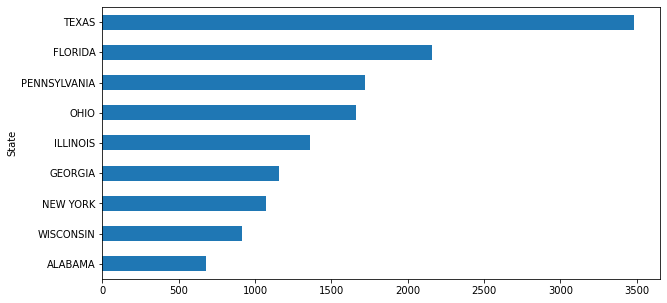

In [ ]:
# Ραβδόγραμμα των πρώτων 9 Πολιτειών σε ατυχήματα
accidents.groupby('State')['EventDate'].count().sort_values(ascending=True).tail(9).plot.barh(figsize=(10,5))

Εξαγωγή των δεδομένων για δημιουργία χάρτη στο datawrapper

In [ ]:
# Εγγραφή της λίστας των Πολιτειών σε dataframe με όνομα topstates
d = accidents.groupby('State')['EventDate'].count().sort_values(ascending=False)
topstates = pd.DataFrame(data=d).reset_index().rename(columns={'EventDate': 'Accidents'})
topstates.head()

,State,Accidents
0,TEXAS,3481
1,FLORIDA,2160
2,PENNSYLVANIA,1723
3,OHIO,1658
4,ILLINOIS,1362


In [ ]:
# Σύνδεση του drive για αποθήκευση του csv
from google.colab import drive # import the drive library
drive.mount('/content/gdrive') # mount a folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls '/content/gdrive/MyDrive/Colab Notebooks/EDDE2/' # view contents of MyDrive

 accidents-us-map.png                 Homework6-Paraskevas.ipynb
'Grafimata (rich people).ipynb'       topstates-in-accidents.csv
 Homework3Α_movies-Paraskevas.ipynb   une_rt_a_1_Data.csv
 Homework4_animals-Paraskevas.ipynb   une_rt_a_Label.csv


In [ ]:
# Εξαγωγή του dataframe σε csv και αποθήκευσή του στο drive
topstates.to_csv("/content/gdrive/MyDrive/Colab Notebooks/EDDE2/topstates-in-accidents.csv")

Εισήγαγα το csv στο Datawrapper και έφτιαξα έναν χάρτη που αποτυπώνει τις Πολιτείες με τα περισσότερα εργατικά ατυχήματα. 

Ο interactive χάρτης είναι [εδώ](https://www.datawrapper.de/_/CIjSe/)

Εισαγωγή της εικόνας του χάρτη που έφτιαξα στο Datawrapper στο notebook

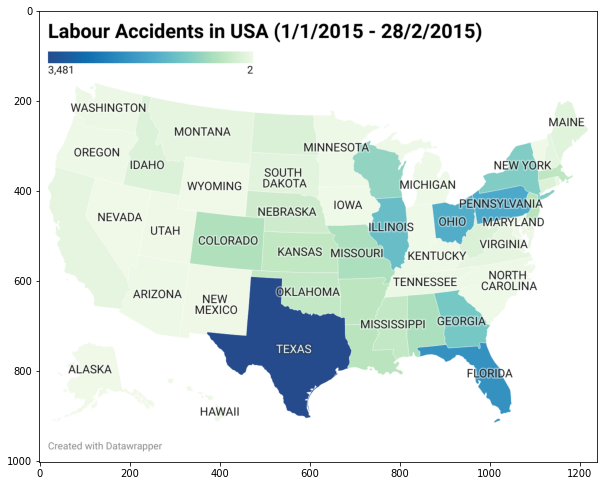

In [ ]:
# Εισαγωγή της βιβλιοθήκης ανάγνωσης εικόνων imageio
import imageio as iio
 
# read the map image
mapimg = iio.imread("/content/gdrive/MyDrive/Colab Notebooks/EDDE2/accidents-us-map.png")
 
# write it in a new format
#iio.imwrite("g4g.jpg", img)

plt.figure(figsize = (10,10)) # διαμόρφωση του μεγέθους
plt.imshow(mapimg) # εκτύπωση του χάρτη

####2. Τι είδους ατυχήματα (Nature) είναι τα περισσότερα ατυχήματα;

In [ ]:
accidents.keys()

Index(['EventDate', 'Employer', 'City', 'State', 'Hospitalized', 'Amputation',
       'Final Narrative', 'Nature', 'NatureTitle', 'Part of Body',
       'Part of Body Title', 'Event', 'EventTitle', 'Source', 'SourceTitle',
       'NatureCat', 'PartOfBodyCat', 'EventCat', 'SourceCat'],
      dtype='object')

In [ ]:
accidents['NatureCat'].unique()

array(['Traumatic injuries and disorders',
       'Symptoms, signs, and ill-defined conditions', 'NC',
       'Diseases and disorders of body systems',
       'Infectious and parasitic diseases',
       'Exposures to disease—no illness incurred',
       'Other diseases, conditions, and disorders'], dtype=object)

In [ ]:
accidents.groupby('NatureCat')['EventDate'].count().sort_values(ascending=False) #(ascending=True).tail(9).plot.barh(figsize=(10,5))

NatureCat
Traumatic injuries and disorders               21505
Diseases and disorders of body systems            33
Symptoms, signs, and ill-defined conditions       29
NC                                                 6
Other diseases, conditions, and disorders          3
Exposures to disease—no illness incurred           1
Infectious and parasitic diseases                  1
Name: EventDate, dtype: int64

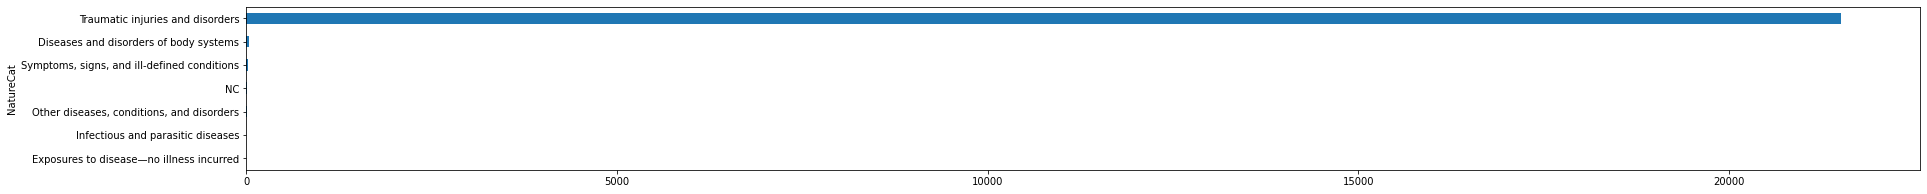

In [ ]:
accidents.groupby('NatureCat')['EventDate'].count().sort_values(ascending=True).tail(9).plot.barh(figsize=(30,3))

Σχεδόν όλα τα εργατικά ατυχήματα αφορούν τραυματισμούς και δυσλειτουργίες. Επειδή αυτό είναι αναμενώμενο, ας δούμε τι γίνεται στη 2η κατηγορία 'Diseases and disorders of body systems'. 

In [ ]:
accidents[accidents['NatureCat'] == "Diseases and disorders of body systems"].groupby('NatureTitle')['EventDate'].count().sort_values(ascending=False)

NatureTitle
Myocardial infarction (heart attack)                                      13
Stroke                                                                     4
Cellulitis and abscess                                                     3
Infections of the skin and subcutaneous tissue, unspecified                2
Pneumonia                                                                  2
Blindness, low vision                                                      1
Bursitis                                                                   1
Endocrine, nutritional, metabolic, and immunity disorders, n.e.c.          1
Endocrine, nutritional, metabolic, and immunity disorders, unspecified     1
Influenza-common                                                           1
Influenza-novel                                                            1
Ischemic heart disease, unspecified                                        1
Methicillin-resistant staphylococcus aureus (MRSA) infection    

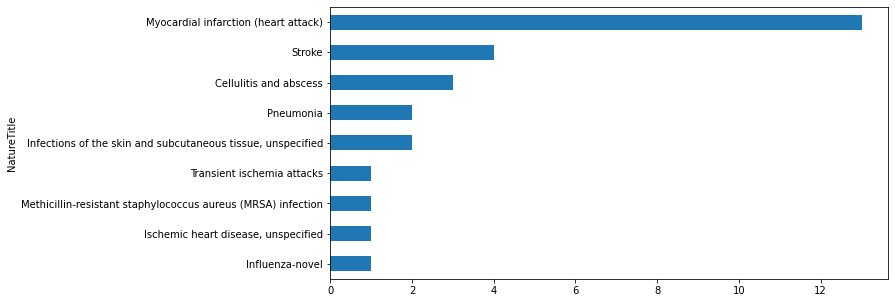

In [ ]:
accidents[accidents['NatureCat'] == "Diseases and disorders of body systems"].groupby('NatureTitle')['EventDate'].count().sort_values(ascending=True).tail(9).plot.barh(figsize=(10,5))

Στην κατηγορία 'Ασθένειες και σωματικές δυσλειτουργίες', πρώτα είναι τα εμφράγματα και τα εγκεφαλικά.

Ας δούμε σε ποιές πολιτείες έχουν συμβεί.

In [ ]:
accidents[accidents['NatureTitle'] == "Myocardial infarction (heart attack)"].groupby('State')['EventDate'].count().sort_values(ascending=False)

State
TEXAS                   3
COLORADO                1
CONNECTICUT             1
DISTRICT OF COLUMBIA    1
ILLINOIS                1
KANSAS                  1
MASSACHUSETTS           1
NEW YORK                1
OHIO                    1
PENNSYLVANIA            1
WISCONSIN               1
Name: EventDate, dtype: int64

Ας δούμε και ποιες εταιρίες ήταν αυτές που είχαμε τα εμφράγματα στο TEXAS καθώς και περισσότερα στοιχεία για τα περιστατικά.

In [ ]:
accidents[(accidents['NatureTitle'] == "Myocardial infarction (heart attack)") & (accidents['State'] == 'TEXAS')][['Employer', 'Part of Body Title', 'EventTitle', 'SourceTitle']]

,Employer,Part of Body Title,EventTitle,SourceTitle
18796,US Border Patrol,BODY SYSTEMS,"Overexertion involving outside sources, n.e.c.","Bicycle, pedal cycle"
19198,Rollins Inc.,BODY SYSTEMS,"Overexertion and bodily reaction, unspecified","Person-injured or ill worker, unspecified"
20380,USPS,BODY SYSTEMS,Overexertion in throwing-single episode,"Packages, parcels"


####3. Σε ποιες εταιρίες συνέβησαν τα περισσότερα ατυχήματα;

In [ ]:
accidents.groupby('Employer')['EventDate'].count().sort_values(ascending=False).head(20)

Employer
U.S. Postal Service             129
U.S. POSTAL SERVICE              58
United States Postal Service     53
UPS                              51
USPS                             40
US Postal Service                34
United Parcel Service            31
Walmart                          20
Tyson Foods, Inc.                19
Waste Management                 16
Publix Super Markets, Inc.       15
United Parcel Service, Inc.      14
Sodexo                           14
Publix                           14
Halliburton Energy Services      13
Labor Ready                      13
Asplundh Tree Expert Company     13
International Paper              12
DHL Supply Chain                 12
Basic Energy Services            12
Name: EventDate, dtype: int64

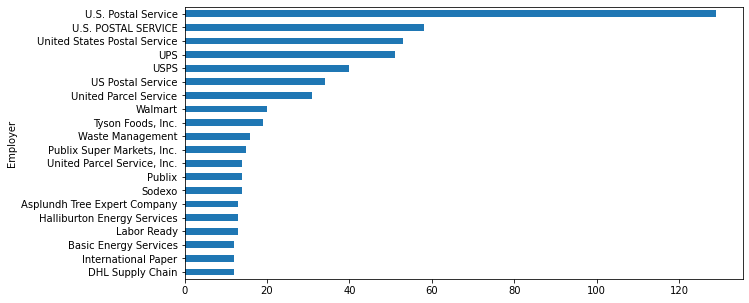

In [ ]:
accidents.groupby('Employer')['EventDate'].count().sort_values(ascending=True).tail(20).plot.barh(figsize=(10,5))

Μμμμ... Τα Αμερικανικά Ταχυδρομεία (U.S. Postal Service) φαίνεται ότι έχουν καταχωρηθεί με διάφορους τρόπους. Ωστόσο φαίνεται ότι είναι και ο πιο επικίνδυνος εργοδότης.

Για καλύτερη επισκόπηση φτιάχνω μια νέα στήλη εργοδοτών (EmployerNew), στην οποία μετονομάζω όλες τις εγγραφές στο Employer που αναφέρονται στα Αμερικανικά Ταχυδρομεία σε U.S. Postal Service.

In [ ]:
accidents[accidents['Employer'].str.contains(r'Postal|POSTAL', regex=True)].groupby('Employer')['Employer'].count().sort_values(ascending=False)

Employer
U.S. Postal Service                                129
U.S. POSTAL SERVICE                                 58
United States Postal Service                        53
US Postal Service                                   34
U.S. Postal Service                                  7
                                                  ... 
U.S. Postal Service - Marshall Post Office           1
U.S. Postal Service - Montebello                     1
Matheson Postal                                      1
U.S. Postal Service Cottage Grove Carrier Annex      1
United States Postal Sevice (USPS)                   1
Name: Employer, Length: 68, dtype: int64

Θέλω να δω όλες τις εγγραφές (Length: 68), οπότε θέτω το display_max_rows στο shape του dataframe.

In [ ]:
pd.set_option('display.max_rows', accidents.shape[0])
accidents[accidents['Employer'].str.contains(r'.*(?i)postal.*', regex=True)].groupby('Employer')['Employer'].count().sort_values(ascending=False)
# pd.reset_option('display.max_rows') # to reset 'display.max_rows' later

Employer
U.S. Postal Service                                                  129
U.S. POSTAL SERVICE                                                   58
United States Postal Service                                          53
US Postal Service                                                     34
U.S. Postal Service                                                    7
U. S. Postal Service                                                   7
United States Postal Services                                          6
UNITED STATES POSTAL SERVICE                                           3
United States Postal Service                                           3
US POSTAL SERVICE                                                      2
US Postal Service Artesia                                              2
U.S. Postal Service - Los Angeles                                      2
U.S. Postal Service - St. Paul Processing & Distribution Center        2
U. S. Postal Service                      

Όλες αυτές οι εγγραφές που περιέχουν τη λέξη postal αναφέρονται στο US Postal Service, εκτός από 2: Siemens Postal και Matheson Postal

Θα αλλάξω όλες τις ονομασίες που περιέχουν τη λέξη postal σε U.S. Postal Service, εκτός από τις εγγραφές της Siemens και της Matheson 

In [ ]:
# Φτιάχνω αντίγραφο της στήλης Employer που θα κάνω τις αλλαγές
accidents['EmployerNew'] = accidents['Employer']

# Αλλάζω το postal σε post στις εγγραφές της Siemens και της Matheson
accidents.loc[accidents['EmployerNew'].str.contains('Siemens Postal, Parcel [&\sand]*? Airport Logistics\,?\s?.*'), 'EmployerNew'] = 'Siemens Post, Parcel & Airport Logistics LLC'
accidents.loc[accidents['EmployerNew'].str.contains('Matheson Postal'), 'EmployerNew'] = 'Matheson Post'

# Για να ελέγξω αν έγιναν σωστά οι αλλαγές στα postal
#accidents[accidents['EmployerNew'].str.contains(r'(?i)postal', regex=True)].groupby('EmployerNew')['EmployerNew'].count().sort_values(ascending=False)

# Για να ελέγξω αν έγινε σωστά η αλλαγή στη Siemens
#accidents[accidents['EmployerNew'].str.contains('Siemens')].groupby('EmployerNew')['EmployerNew'].count().sort_values(ascending=False)



In [ ]:
# Αλλάζω όλες τις ονομασίες που περιέχουν το postal σε U.S. Postal Service
accidents['EmployerNew'] = accidents['EmployerNew'].replace(r'.*(?i)postal[a-zA-Z\s\,\.&#\/\(\:\0-9\)-\-]*|.*USPS.*', 'U.S. Postal Service', regex=True)
# Τσεκάρω τις αλλαγές
accidents[accidents['EmployerNew'].str.contains(r'(?i)postal', regex=True)].groupby('EmployerNew')['EmployerNew'].count().sort_values(ascending=False)

EmployerNew
U.S. Postal Service    414
Name: EmployerNew, dtype: int64

In [ ]:
# Επαναφέρω το post σε postal στις εγγραφές της Siemens και της Matheson
accidents.loc[accidents['EmployerNew'].str.contains('Siemens Post, Parcel [&\sand]*? Airport Logistics\,?\s?.*'), 'EmployerNew'] = 'Siemens Postal, Parcel & Airport Logistics LLC'
accidents.loc[accidents['EmployerNew'].str.contains('Matheson Post'), 'EmployerNew'] = 'Matheson Postal'

# Για να ελέγξω αν έγινε σωστά η αλλαγή στη Siemens
#accidents[accidents['EmployerNew'].str.contains('Siemens')].groupby('EmployerNew')['EmployerNew'].count().sort_values(ascending=False)

In [ ]:
pd.reset_option('display.max_rows') # to reset 'display.max_rows'

Τελικά ποιες εταιρίες συνέβησαν τα περισσότερα ατυχήματα;

In [ ]:
accidents.groupby('EmployerNew')['EventDate'].count().sort_values(ascending=False).head(20)

EmployerNew
U.S. Postal Service                    414
UPS                                     51
United Parcel Service                   31
Walmart                                 20
Tyson Foods, Inc.                       19
Waste Management                        16
Publix Super Markets, Inc.              15
Sodexo                                  14
Publix                                  14
United Parcel Service, Inc.             14
Asplundh Tree Expert Company            13
Halliburton Energy Services             13
Labor Ready                             13
International Paper                     12
Basic Energy Services                   12
DHL Supply Chain                        12
Giant Eagle                             11
Walt Disney World Parks and Resorts     11
Lowe's Home Centers, LLC                11
Kroger                                  10
Name: EventDate, dtype: int64

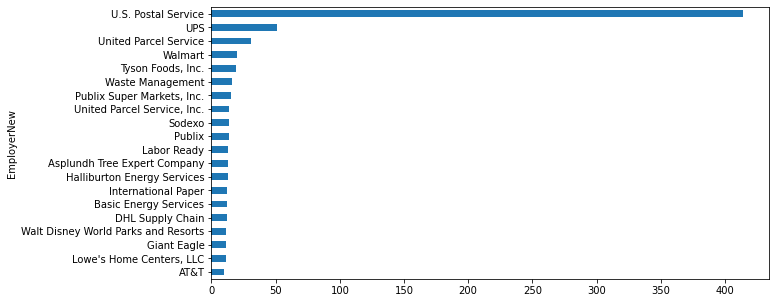

In [ ]:
# Ραβδόγραμμα με τις πρώτες 20 εταιρίες σε ατυχήματα
accidents.groupby('EmployerNew')['EventDate'].count().sort_values(ascending=True).tail(20).plot.barh(figsize=(10,5))

####4. Τι είδους ατυχήματα είναι τα ατυχήματα στα Ταχυδρομεία?

In [ ]:
accidents[accidents['EmployerNew'] == 'U.S. Postal Service'].groupby('NatureTitle')['EventDate'].count().sort_values(ascending=False)

NatureTitle
Fractures                                                                  177
Amputations                                                                 41
Soreness, pain, hurt-nonspecified injury                                    40
Effects of heat and light, unspecified                                      28
Intracranial injuries, unspecified                                          17
Traumatic injuries and disorders, unspecified                               15
Puncture wounds, except gunshot wounds                                      15
Effects of heat and light, n.e.c.                                           10
Cuts, lacerations                                                            8
Fractures and other injuries, n.e.c.                                         7
Internal injuries to organs and blood vessels of the trunk                   7
Fractures and dislocations                                                   6
Heat exhaustion, prostration            

Τα ατυχήματα στα Ταχυδρομεία είναι κυρίως κατάγματα, με δεύτερα τους ακρωτηριασμούς

In [ ]:
accidents.keys()

Index(['EventDate', 'Employer', 'City', 'State', 'Hospitalized', 'Amputation',
       'Final Narrative', 'Nature', 'NatureTitle', 'Part of Body',
       'Part of Body Title', 'Event', 'EventTitle', 'Source', 'SourceTitle',
       'NatureCat', 'PartOfBodyCat', 'EventCat', 'SourceCat', 'EmployerNew'],
      dtype='object')

####5. Πόσοι είναι γενικά οι ακρωτηριασμοί;

In [ ]:
# Ξαναβλέπω τι τιμές παίρνει το Amputation 
accidents['Amputation'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  9.])

In [ ]:
accidents[accidents['Amputation'] > 0].groupby('Amputation')['EventDate'].count() 

Amputation
1.0    5764
2.0      18
3.0       3
4.0       1
9.0       1
Name: EventDate, dtype: int64

####6. Σε ποιες Πολιτείες συμβαίνουν τα ατυχήματα στα Ταχυδρομεία;

In [ ]:
accidents[accidents['EmployerNew'] == 'U.S. Postal Service'].groupby('State')['EventDate'].count().sort_values(ascending=False)

State
TEXAS             33
NEW YORK          32
ILLINOIS          29
CALIFORNIA        25
OHIO              23
PENNSYLVANIA      18
NEW JERSEY        16
MASSACHUSETTS     15
TENNESSEE         15
MISSOURI          14
FLORIDA           13
KANSAS            12
WASHINGTON        12
INDIANA           11
GEORGIA           11
VIRGINIA          11
MICHIGAN          11
MINNESOTA         11
LOUISIANA          9
WISCONSIN          8
OKLAHOMA           7
NORTH CAROLINA     7
ARIZONA            6
MARYLAND           6
COLORADO           5
IOWA               4
MONTANA            4
CONNECTICUT        4
UTAH               4
KENTUCKY           4
OREGON             3
DELAWARE           3
SOUTH CAROLINA     3
ARKANSAS           3
MISSISSIPPI        3
NEW MEXICO         3
NEW HAMPSHIRE      3
HAWAII             2
VERMONT            2
WEST VIRGINIA      2
NEBRASKA           2
NEVADA             1
RHODE ISLAND       1
MAINE              1
SOUTH DAKOTA       1
NORTH DAKOTA       1
Name: EventDate, dtype: int6

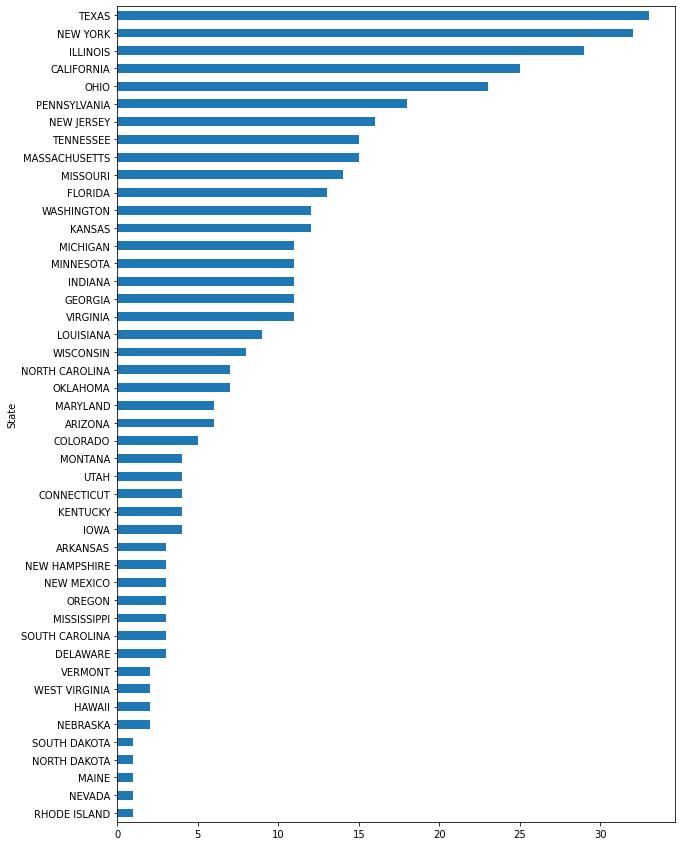

In [ ]:
accidents[accidents['EmployerNew'] == 'U.S. Postal Service'].groupby('State')['EventDate'].count().sort_values(ascending=True).plot.barh(figsize=(10,15))

####7. Σε ποιο σημείο του σώματος είναι οι ακρωτηριασμοί που συμβαίνουν στα ταχυδρομεία;

In [ ]:
accidents[(accidents['EmployerNew'].str.contains('U.S. Postal')) & (accidents['NatureTitle'] == 'Amputations')].groupby('PartOfBodyCat')['PartOfBodyCat'].count().sort_values(ascending=False)

PartOfBodyCat
Upper extremities    39
Lower extremities     1
NC                    1
Name: PartOfBodyCat, dtype: int64

Στα άνω άκρα

####8. Τι είδους είναι τα περιστατικά των ακρωτηριασμών των άνω άκρων στα ταχυδρομεία;

In [ ]:
accidents[(accidents['EmployerNew'].str.contains('U.S. Postal')) & (accidents['NatureTitle'] == 'Amputations') & (accidents['PartOfBodyCat'] == 'Upper extremities')].groupby('EventCat')['EventCat'].count().sort_values(ascending=False)

EventCat
Contact with objects and equipment                   34
Violence and other injuries by persons or animals     4
Transportation incidents                              1
Name: EventCat, dtype: int64

####9. Πώς κατανέμονται τα ατυχήματα βάσει του Event και πώς βάσει του Source;

In [ ]:
accidents.groupby('EventCat')['EventCat'].count().sort_values(ascending=False)

EventCat
Contact with objects and equipment                   10126
Falls, slips, trips                                   6516
Exposure to harmful substances or environments        1830
Transportation incidents                              1654
Violence and other injuries by persons or animals      440
Overexertion and bodily reaction                       396
Fires and explosions                                   351
NC                                                     265
Name: EventCat, dtype: int64

In [ ]:
accidents.groupby('SourceCat')['SourceCat'].count().sort_values(ascending=False)

SourceCat
Machinery                                 5509
Structures and surfaces                   4494
Vehicles                                  2815
Parts and materials                       2475
Tools, instruments, and equipment         1969
Other sources                             1034
Containers, furniture and fixtures         976
Persons, plants, animals, and minerals     940
NC                                         741
Chemicals and chemical products            625
Name: SourceCat, dtype: int64

####10. Διαφοροποιούνται τα ατυχήματα ανά έτος ή ανά μήνα;

In [ ]:
accidents.dtypes

EventDate              object
Employer               object
City                   object
State                  object
Hospitalized          float64
Amputation            float64
Final Narrative        object
Nature                  int64
NatureTitle            object
Part of Body            int64
Part of Body Title     object
Event                   int64
EventTitle             object
Source                  int64
SourceTitle            object
NatureCat              object
PartOfBodyCat          object
EventCat               object
SourceCat              object
EmployerNew            object
dtype: object

Οι ημερομηνίες είναι string. Επομένως πρέπει να τις κάνω datetime (η μορφή των ημερομηνιών είναι m/d/yyyy).

In [ ]:
# Μετατροπή σε datetime και εγγραφή της σε νέα στήλη
accidents['datetime'] = pd.to_datetime(accidents['EventDate'], format='%m/%d/%Y')
accidents.head(3)

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,NatureCat,PartOfBodyCat,EventCat,SourceCat,EmployerNew,datetime
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,Traumatic injuries and disorders,Lower extremities,Violence and other injuries by persons or animals,"Persons, plants, animals, and minerals",FCI Otisville Federal Correctional Institution,2015-01-01
1,1/1/2015,Kalahari Manufacturing LLC,LAKE DELTON,WISCONSIN,1.0,0.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",Traumatic injuries and disorders,Lower extremities,Fires and explosions,"Tools, instruments, and equipment",Kalahari Manufacturing LLC,2015-01-01
2,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,1.0,0.0,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",Traumatic injuries and disorders,NC,"Falls, slips, trips",Vehicles,Schneider National Bulk Carrier,2015-01-01


In [ ]:
FirstDateTime = accidents['datetime'].min()
LastDateTime = accidents['datetime'].max()
print('Time Period: from {} to {}'.format(FirstDateTime, LastDateTime))

Time Period: from 2015-01-01 00:00:00 to 2017-02-28 00:00:00


In [ ]:
accidents.groupby('datetime')['EventDate'].count()

datetime
2015-01-01     7
2015-01-02    15
2015-01-03     7
2015-01-04    16
2015-01-05    41
              ..
2017-02-24    27
2017-02-25    11
2017-02-26     6
2017-02-27    44
2017-02-28    25
Name: EventDate, Length: 790, dtype: int64

Ας δω ποιος είναι ο μ.ο. των ατυχημάτων ανά ημέρα.

In [ ]:
# Ο μ.ο. είναι το πηλίκο του αθροίσματος των ημερήσιων ατυχημάτων διά του πλύθους των ημερών των ατυχημάτων.
# Με groupby ανά datetime και count παίρνω series και με tolist() τις κάνω λίστες. Μετά κάνω τη διαίρεση.
accperday = sum(accidents.groupby('datetime')['EventDate'].count().tolist()) / len(accidents.groupby('datetime')['EventDate'].count().tolist())
accperday

27.313924050632913

Ο μ.ο. των ημερήσιων ατυχημάτων είναι 27,32.

(άρα προβλέπουμε ότι ο μ.ο. των ατυχημάτων ανά μήνα θα είναι γύρω στα 840). Για να δούμε.

Θέλω να δω ποιος είναι ο μέσος όρος των ατυχημάτων ανά μήνα (άσχετα με το έτος). Χρειάζομαι το πλήθος των ατυχημάτων ανά μήνα-έτος, και μετά το μέσο όρο των μηνοετών.

In [ ]:
# Δημιουργία νέας στήλης από το datetime που να έχει μαζί το έτος και το μήνα (ΥΥΥΥ-Μ)
accidents['year_month'] = accidents['datetime'].dt.strftime('%Y-%m')
accidents.head(1)

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,NatureCat,PartOfBodyCat,EventCat,SourceCat,EmployerNew,datetime,year_month
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,Traumatic injuries and disorders,Lower extremities,Violence and other injuries by persons or animals,"Persons, plants, animals, and minerals",FCI Otisville Federal Correctional Institution,2015-01-01,2015-01


Τώρα γκρουπάρω ανά μηνα-έτος και μετρώ τα περιστατικά (τα rows). Παίρνω 2 λίστες: το μηνα-έτος και το πλήθος των περιστατικών και στη συνέχεια φτιάχνω με αυτά ένα νέο dataframe (accidents per month) 

In [ ]:
d = accidents.groupby('year_month')['EventDate'].count()
dyearmonth = d.index.tolist()
daccidents = d.tolist()
accpermonth = pd.DataFrame(list(zip(dyearmonth, daccidents)), columns =['Year Month', '#Accidents'])
accpermonth.head()

,Year Month,#Accidents
0,2015-01,855
1,2015-02,765
2,2015-03,851
3,2015-04,801
4,2015-05,795


Στη συνέχεια χωρίζω με split το έτος από το μήνα σε δύο νέες στήλες.

In [ ]:
accpermonth[['Year', 'Month']] = accpermonth['Year Month'].str.split('-', 1, expand=True)
accpermonth.head()

,Year Month,#Accidents,Year,Month
0,2015-01,855,2015,01
1,2015-02,765,2015,02
2,2015-03,851,2015,03
3,2015-04,801,2015,04
4,2015-05,795,2015,05


Αρχικά υπολογίζω το μηνιαίο μ.ο. ατυχημάτων για κάθε έτος ξεχωριστά. Δεν υπάρχουν σημαντικές διαφορές ανάμεσα στα έτη.

In [ ]:
accpermonth.groupby('Year')['#Accidents'].mean()

Year
2015    821.50
2016    840.75
2017    815.50
Name: #Accidents, dtype: float64

Υπολογίζω το μηνιαίο μ.ο. ατυχημάτων ανά μήνα σε όλα τα χρόνια των δεδομένων και φτιάχνω ένα γράφημα. 

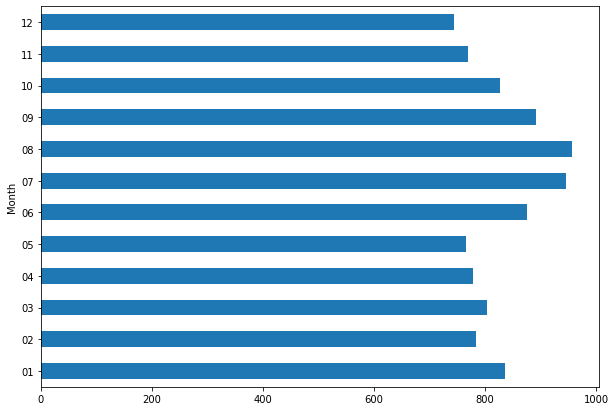

In [ ]:
accpermonth.groupby('Month')['#Accidents'].mean().plot.barh(figsize=(10,7)) #.plot(ylim=(0,1000))

Φαίνεται ότι χειρότεροι μήνες είναι ο Ιούλιος και ο Αύγουστος και ακολουθούν ο Σεπτέμβριος, ο Ιούνιος και ο Ιανουάριος. 

Τέλος υπολογίζω το πλήθος των ατυχημάτων ανά έτος. Σημειώνεται ότι για το 2017 υπάρχουν καταγραφές μόνο για 2 μήνες. Το 2016 φαίνεται ότι η κατάσταση ήταν χειρότερη από το 2015 (περίπου 220 περισσότερα ατυχήματα).

In [ ]:
accpermonth.groupby('Year')['#Accidents'].sum()

Year
2015     9858
2016    10089
2017     1631
Name: #Accidents, dtype: int64

####11. Γκρουπάρισμα ανα State και απαρίθμηση όλων των κατηγοριών

In [ ]:
df1 = accidents.groupby(['State', 'NatureCat', 'EventCat', 'PartOfBodyCat', 'SourceCat']).size().sort_values(ascending=False).reset_index(name='count')#.drop_duplicates(subset='NatureCat')
df1

,State,NatureCat,EventCat,PartOfBodyCat,SourceCat,count
0,TEXAS,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,613
1,OHIO,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,435
2,PENNSYLVANIA,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,359
3,ILLINOIS,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,343
4,GEORGIA,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,313
...,...,...,...,...,...,...
3636,MASSACHUSETTS,Traumatic injuries and disorders,NC,Trunk,NC,1
3637,MASSACHUSETTS,Traumatic injuries and disorders,Overexertion and bodily reaction,Multiple body parts,"Containers, furniture and fixtures",1
3638,MASSACHUSETTS,Traumatic injuries and disorders,Overexertion and bodily reaction,Multiple body parts,NC,1
3639,MASSACHUSETTS,Traumatic injuries and disorders,Overexertion and bodily reaction,NC,"Containers, furniture and fixtures",1


Στη συνέχεια μπορούμε να κοιτάμε ανά State ή και με διάφορους συνδυασμούς κατηγοριών.

Ποιο είναι το πλήθος των ατυχημάτων στη Νέα Υόρκη για όλους τους συνδυασμούς των διαθέσιμων χαρακτηριστικών; Ποιοι συνδυασμοί είναι συχνότεροι; 

In [ ]:
df1[df1['State'] == "NEW YORK"]

,State,NatureCat,EventCat,PartOfBodyCat,SourceCat,count
9,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Machinery,184
36,NEW YORK,Traumatic injuries and disorders,"Falls, slips, trips",Lower extremities,Structures and surfaces,75
41,NEW YORK,Traumatic injuries and disorders,"Falls, slips, trips",Trunk,Structures and surfaces,72
88,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Parts and materials,38
106,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Vehicles,31
...,...,...,...,...,...,...
3324,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Trunk,"Persons, plants, animals, and minerals",1
3325,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Trunk,Structures and surfaces,1
3326,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Chemicals and chemical products,1
3327,NEW YORK,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Other sources,1


Ποια είναι τα χαρακτηριστικά των ατυχημάτων στο OHIO με εμπλεκόμενα οχήματα;

In [ ]:
df1[(df1['State'] == 'OHIO') & (df1['NatureCat'].str.contains('Traumatic')) & (df1['SourceCat'] == 'Vehicles')]

,State,NatureCat,EventCat,PartOfBodyCat,SourceCat,count
35,OHIO,Traumatic injuries and disorders,Transportation incidents,Lower extremities,Vehicles,77
129,OHIO,Traumatic injuries and disorders,Contact with objects and equipment,Upper extremities,Vehicles,27
189,OHIO,Traumatic injuries and disorders,Transportation incidents,NC,Vehicles,19
211,OHIO,Traumatic injuries and disorders,Transportation incidents,Trunk,Vehicles,18
278,OHIO,Traumatic injuries and disorders,"Falls, slips, trips",Trunk,Vehicles,14
306,OHIO,Traumatic injuries and disorders,Transportation incidents,Upper extremities,Vehicles,13
316,OHIO,Traumatic injuries and disorders,Contact with objects and equipment,Lower extremities,Vehicles,12
382,OHIO,Traumatic injuries and disorders,"Falls, slips, trips",Multiple body parts,Vehicles,10
412,OHIO,Traumatic injuries and disorders,Contact with objects and equipment,Trunk,Vehicles,9
470,OHIO,Traumatic injuries and disorders,Transportation incidents,Head,Vehicles,8


Ποιες είναι οι πρώτες 10 Πολιτείες σε ατυχήματα που εμπλέκονται οχήματα;

In [ ]:
df1[df1['SourceCat'] == 'Vehicles'].groupby('State').size().sort_values(ascending=False).reset_index(name='count').head(10)

,State,count
0,TEXAS,30
1,FLORIDA,27
2,OHIO,22
3,NEW YORK,22
4,PENNSYLVANIA,21
5,GEORGIA,20
6,NEW JERSEY,20
7,ALABAMA,19
8,LOUISIANA,19
9,COLORADO,19


Text(0.5, 0, 'States')

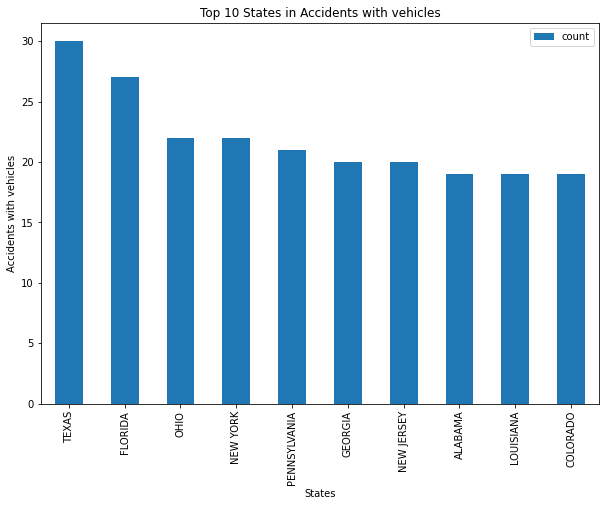

In [ ]:
df1[df1['SourceCat'] == 'Vehicles'].groupby('State').size().sort_values(ascending=False).reset_index(name='count').set_index('State').head(10).plot.bar(figsize=(10,7))
plt.title("Top 10 States in Accidents with vehicles")
plt.ylabel("Accidents with vehicles")
plt.xlabel("States")

Ποιο είδος περιστατικού είναι πρώτο σε κάθε State?

In [ ]:
df1.groupby(['EventCat', 'State']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='State').head(25)

,EventCat,State,count
0,Contact with objects and equipment,TEXAS,62
1,Contact with objects and equipment,PENNSYLVANIA,54
2,Contact with objects and equipment,FLORIDA,52
4,Contact with objects and equipment,OHIO,50
6,Contact with objects and equipment,GEORGIA,47
7,Contact with objects and equipment,ILLINOIS,46
9,Contact with objects and equipment,NEW YORK,45
13,Contact with objects and equipment,MISSOURI,39
15,Contact with objects and equipment,COLORADO,39
16,Contact with objects and equipment,WISCONSIN,38


Σε ποια Πολιτεία είχαμε τα περισσότερα γλιστρήματα;

In [ ]:
df1[df1['EventCat'].str.contains('Falls')].groupby('State')['State'].count().sort_values(ascending=False).head(16)

State
FLORIDA          51
TEXAS            48
ILLINOIS         45
GEORGIA          42
OHIO             41
NEW YORK         39
PENNSYLVANIA     38
LOUISIANA        37
MISSOURI         35
NEW JERSEY       34
MASSACHUSETTS    34
ALABAMA          34
WISCONSIN        33
COLORADO         32
OKLAHOMA         32
KANSAS           31
Name: State, dtype: int64

###Είδος ατυχήματος (NatureCat) ανά Πολιτεία 

In [ ]:
accidents.head(1)

,EventDate,Employer,City,State,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,NatureCat,PartOfBodyCat,EventCat,SourceCat,EmployerNew,datetime,year_month
0,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,Traumatic injuries and disorders,Lower extremities,Violence and other injuries by persons or animals,"Persons, plants, animals, and minerals",FCI Otisville Federal Correctional Institution,2015-01-01,2015-01


θέλω να μετρήσω τα περιστατικά (δηλ. τα rows) ανά Πολιτεία και ανά NatureCat, οπότε κάνω διπλό groupby και παίρνω το size. Φτιάχνω ένα νέο df με τα νέα δεδομένα προσθέτοντας και μια νέα στήλη (count) με τα πλήθη των περιστατικών. 

In [ ]:
#με το reset_index καταργώ το διπλό level στα headers των στηλών και δίνω όνομα στη στήλη των αθροισμάτων 
dfNC = accidents.groupby(['State', 'NatureCat']).size().sort_values(ascending=False).reset_index(name='count')
dfNC.head(1)

,State,NatureCat,count
0,TEXAS,Traumatic injuries and disorders,3464


Θέλω να κάνω τις κατηγορίες της στήλης NatureCat στήλες και να βάλω στα κελιά τα counts. Αυτό γίνεται με το pivot_table.

In [ ]:
# φτιάχνω νέο df και στα κελιά που δεν έχουν τιμή (NaN) αντικαθιστώ με το 0 (fill_value=0)
dfNCn = pd.pivot_table(dfNC, index="State",columns="NatureCat", values='count', fill_value=0).reset_index().rename_axis(None, axis=1)
# για να κάνω ραβδογράμματα με πολλαπλές στήλες ανά State, κάνω τη στήλη State, index 
dfNCn.set_index('State', inplace=True)
dfNCn.index.name = None
# για να ταξινομήσω τις Πολιτείες βάσει του συνολικού πλήθους των ατυχημάτων, παίρνω τα αθροίσματα ανά row και τα βάζω σε μια νέα στήλη με ονομα sum
dfNCn["sum"] = dfNCn.sum(axis=1)
dfNCn = dfNCn.sort_values('sum', ascending=False)
dfNCn.head(10).T # με το Τ (Transpose), γυρίζω τον πίνακα από οριζόντιο σε κάθετο [για να δω όλες τις κατηγορίες χωρίς να πρέπει να κάνω scroll]

,TEXAS,FLORIDA,PENNSYLVANIA,OHIO,ILLINOIS,GEORGIA,NEW YORK,WISCONSIN,ALABAMA,MISSOURI
Diseases and disorders of body systems,4,3,2,2,1,0,2,4,0,0
Exposures to disease—no illness incurred,1,0,0,0,0,0,0,0,0,0
Infectious and parasitic diseases,0,0,0,0,0,0,0,0,0,0
NC,1,2,0,0,0,0,0,0,0,0
"Other diseases, conditions, and disorders",0,0,1,0,0,0,0,1,0,0
"Symptoms, signs, and ill-defined conditions",11,2,3,1,1,1,0,0,1,1
Traumatic injuries and disorders,3464,2153,1717,1655,1360,1155,1067,912,676,674
sum,3481,2160,1723,1658,1362,1156,1069,917,677,675


Φτιάχνω το ραβδόγραμμα, πετώντας τη στήλη sum (την ήθελα μόνο για σορτάρισμα)

Text(0, 0.5, "Number of accidents in 'Nature' Categories")

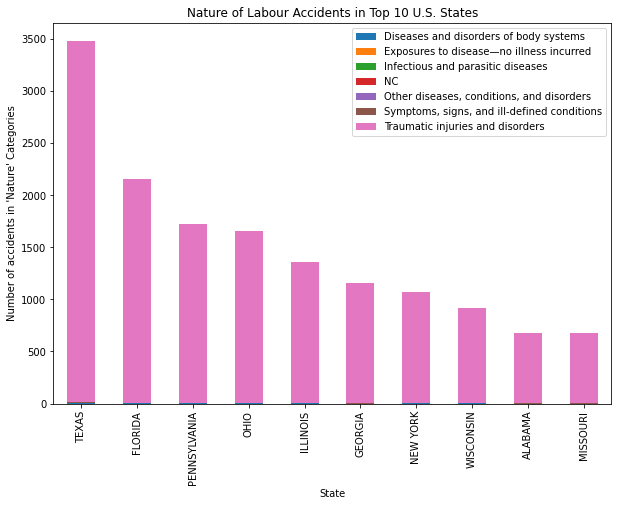

In [ ]:
# επιλέγω stacked για να έχω μια μπάρα και κάθε State (με το head(10) εμφανίζω μόνο τις 10 πρώτες πολιτείες)
dfNCn.drop('sum', axis=1).head(10).plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Nature of Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Number of accidents in 'Nature' Categories")

Με το apply(lambda x: x*100/sum(x), axis=1) μετατρέπω τους αριθμούς σε ποσοστά. Με το axis=1 προσθέτω τις τιμές στα rows.

Text(0, 0.5, "Percentage of Accidents in 'Nature' Categories (%)")

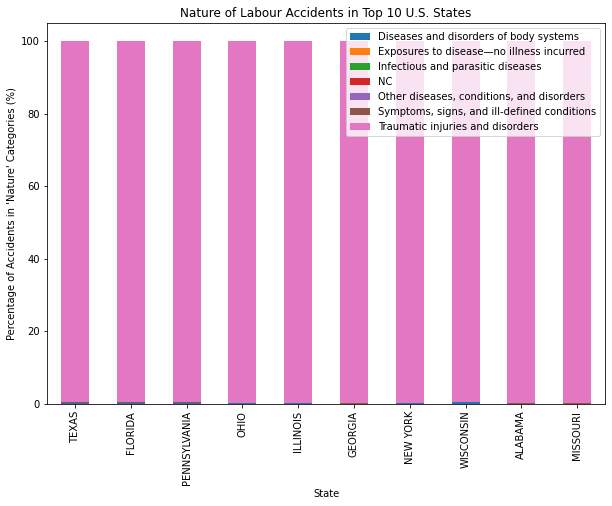

In [ ]:
dfNCnStacked = dfNCn.drop('sum', axis=1).head(10).apply(lambda x: x*100/sum(x), axis=1)
dfNCnStacked.plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Nature of Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of Accidents in 'Nature' Categories (%)")

Το ίδιο με παραπάνω, αλλά χωρίς το head(10), για να τυπώσω όλες τις Πολιτείες.

Text(0, 0.5, "Percentage of Accidents in 'Nature' Categories (%)")

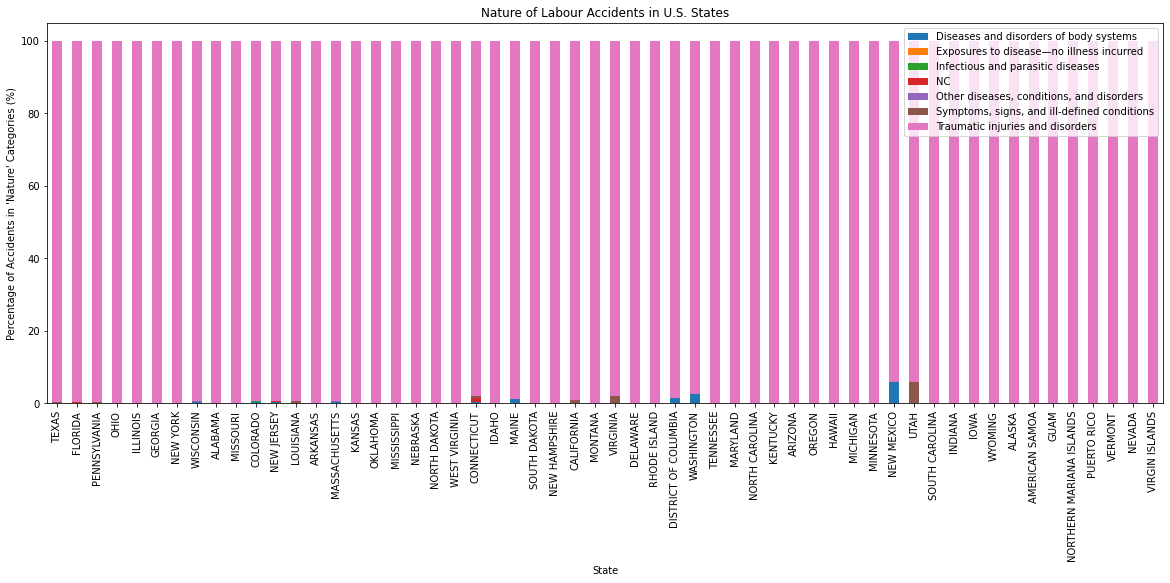

In [ ]:
dfNCnStacked = dfNCn.drop('sum', axis=1).apply(lambda x: x*100/sum(x), axis=1)
dfNCnStacked.plot(kind="bar", stacked=True, figsize=(20,7))
plt.title("Nature of Labour Accidents in U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of Accidents in 'Nature' Categories (%)")

###Μέρος του σώματος που πλήγηκε σε εργατικό ατύχημα (PartOfBodyCat) ανά Πολιτεία 

In [ ]:
dfPC = accidents.groupby(['State', 'PartOfBodyCat']).size().sort_values(ascending=False).reset_index(name='count')#.drop_duplicates(subset='NatureCat')
dfPC.head(1)

,State,PartOfBodyCat,count
0,TEXAS,Upper extremities,1406


In [ ]:
dfPCn = pd.pivot_table(dfPC, index="State",columns="PartOfBodyCat", values='count', fill_value=0).reset_index().rename_axis(None, axis=1)
dfPCn.set_index('State', inplace=True)
dfPCn.index.name = None
dfPCn["sum"] = dfPCn.sum(axis=1)
dfPCn = dfPCn.sort_values('sum', ascending=False)
dfPCn.head(10).T

,TEXAS,FLORIDA,PENNSYLVANIA,OHIO,ILLINOIS,GEORGIA,NEW YORK,WISCONSIN,ALABAMA,MISSOURI
Body systems,234,139,54,61,57,52,28,27,42,43
Exposures to disease — no illness incurred,0,0,1,0,0,0,0,0,0,0
Head,267,159,120,115,100,60,68,56,35,52
Lower extremities,657,425,364,309,247,213,220,152,125,110
Multiple body parts,295,202,108,105,87,113,92,69,51,53
NC,240,159,116,103,103,64,105,34,26,35
"Neck, including throat",15,7,11,5,5,5,6,4,2,4
Trunk,367,284,240,192,162,120,149,108,68,113
Upper extremities,1406,785,709,768,601,529,401,467,328,265
sum,3481,2160,1723,1658,1362,1156,1069,917,677,675


Text(0, 0.5, "Number of accidents in 'Part of Body' Categories")

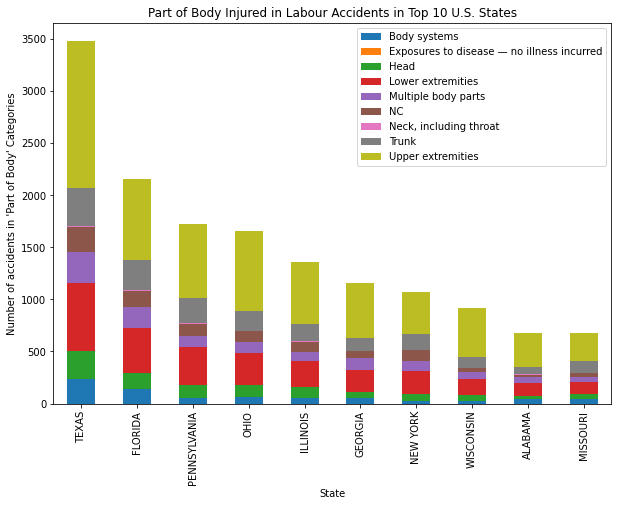

In [ ]:
dfPCn.drop('sum', axis=1).head(10).plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Part of Body Injured in Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Number of accidents in 'Part of Body' Categories")

Text(0, 0.5, "Percentage of accidents in 'Part of Body' Categories")

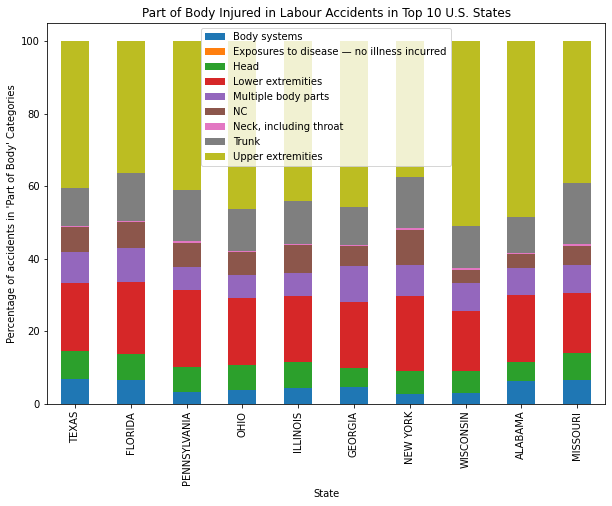

In [ ]:
dfPCnStacked = dfPCn.drop('sum', axis=1).head(10).apply(lambda x: x*100/sum(x), axis=1)
dfPCnStacked.plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Part of Body Injured in Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Part of Body' Categories")

Text(0, 0.5, "Percentage of accidents in 'Part of Body' Categories")

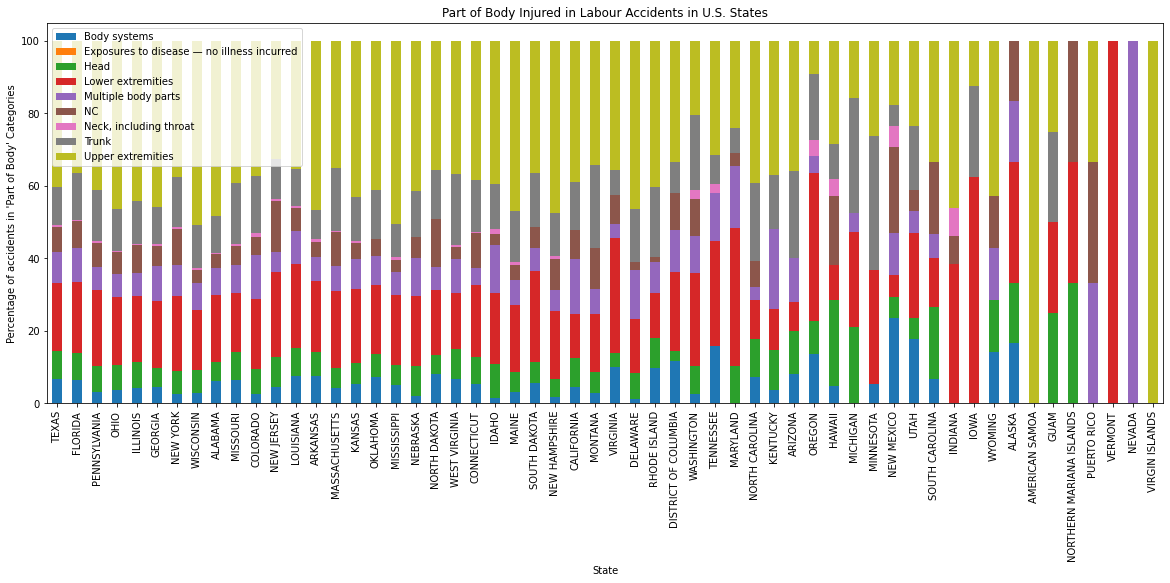

In [ ]:
dfPCnStacked = dfPCn.drop('sum', axis=1).apply(lambda x: x*100/sum(x), axis=1)
dfPCnStacked.plot(kind="bar", stacked=True, figsize=(20,7))
plt.title("Part of Body Injured in Labour Accidents in U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Part of Body' Categories")

###Είδη περιστατικών των εργατικών ατυχημάτων (EventCat) ανά Πολιτεία 

In [ ]:
dfEC = accidents.groupby(['State', 'EventCat']).size().sort_values(ascending=False).reset_index(name='count')#.drop_duplicates(subset='NatureCat')
dfEC.head(1)

,State,EventCat,count
0,TEXAS,Contact with objects and equipment,1644


In [ ]:
dfECn = pd.pivot_table(dfEC, index="State",columns="EventCat", values='count', fill_value=0).reset_index().rename_axis(None, axis=1)
dfECn.set_index('State', inplace=True)
dfECn.index.name = None
dfECn["sum"] = dfECn.sum(axis=1)
dfECn = dfECn.sort_values('sum', ascending=False)
dfECn.head(10).T

,TEXAS,FLORIDA,PENNSYLVANIA,OHIO,ILLINOIS,GEORGIA,NEW YORK,WISCONSIN,ALABAMA,MISSOURI
Contact with objects and equipment,1644,820,815,879,685,589,431,534,372,304
Exposure to harmful substances or environments,353,203,106,95,101,122,87,55,65,61
"Falls, slips, trips",951,829,541,459,369,269,384,225,157,219
Fires and explosions,70,34,24,16,18,13,16,13,8,13
NC,42,22,28,19,20,14,23,8,6,2
Overexertion and bodily reaction,55,47,40,18,29,11,31,20,5,17
Transportation incidents,275,152,139,148,116,118,71,50,53,49
Violence and other injuries by persons or animals,91,53,30,24,24,20,26,12,11,10
sum,3481,2160,1723,1658,1362,1156,1069,917,677,675


Text(0, 0.5, "Number of accidents in 'Event' Categories")

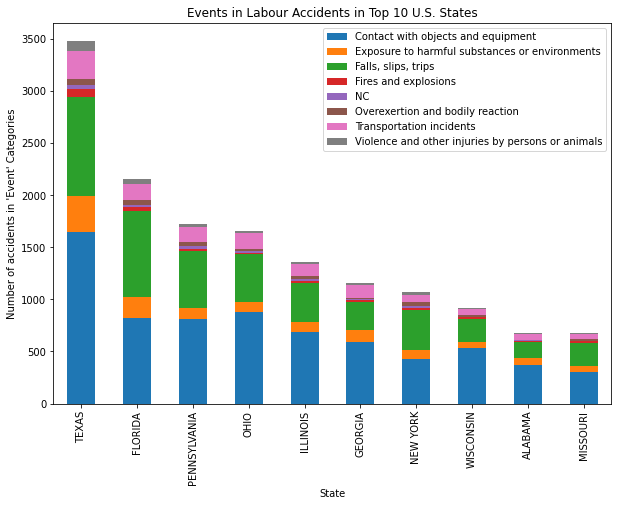

In [ ]:
dfECn.drop('sum', axis=1).head(10).plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Events in Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Number of accidents in 'Event' Categories")

Text(0, 0.5, "Percentage of accidents in 'Event' Categories")

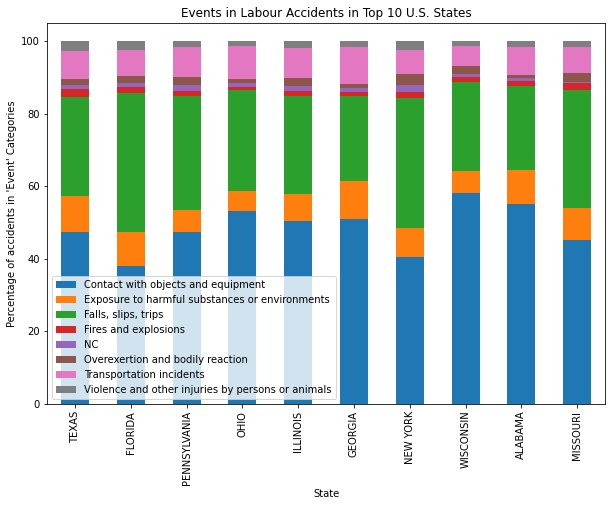

In [ ]:
dfECnStacked = dfECn.drop('sum', axis=1).head(10).apply(lambda x: x*100/sum(x), axis=1)
dfECnStacked.plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Events in Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Event' Categories")

Text(0, 0.5, "Percentage of accidents in 'Event' Categories")

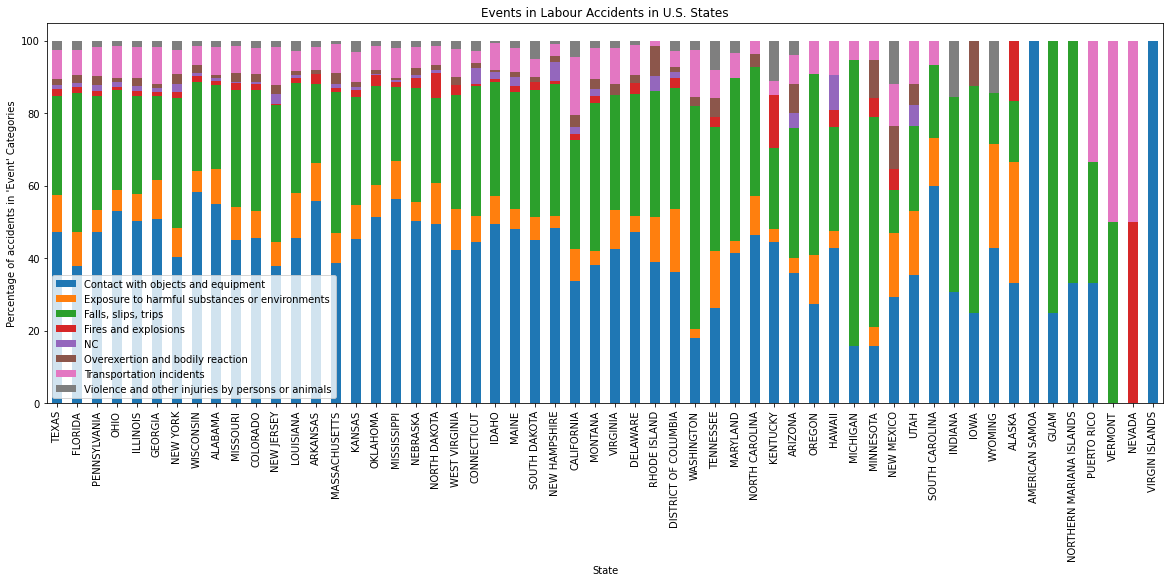

In [ ]:
dfECnStacked = dfECn.drop('sum', axis=1).apply(lambda x: x*100/sum(x), axis=1)
dfECnStacked.plot(kind="bar", stacked=True, figsize=(20,7))
plt.title("Events in Labour Accidents in U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Event' Categories")

###Είδη της πηγής/αιτίας των εργατικών ατυχημάτων (SourceCat) ανά Πολιτεία 

In [ ]:
dfCC = accidents.groupby(['State', 'SourceCat']).size().sort_values(ascending=False).reset_index(name='count')#.drop_duplicates(subset='NatureCat')
dfCC.head(1)

,State,SourceCat,count
0,TEXAS,Machinery,811


In [ ]:
dfCCn = pd.pivot_table(dfCC, index="State",columns="SourceCat", values='count', fill_value=0).reset_index().rename_axis(None, axis=1)
dfCCn.set_index('State', inplace=True)
dfCCn.index.name = None
dfCCn["sum"] = dfCCn.sum(axis=1)
dfCCn = dfCCn.sort_values('sum', ascending=False)
dfCCn.head(10).T

,TEXAS,FLORIDA,PENNSYLVANIA,OHIO,ILLINOIS,GEORGIA,NEW YORK,WISCONSIN,ALABAMA,MISSOURI
Chemicals and chemical products,107,61,52,43,32,46,36,20,18,15
"Containers, furniture and fixtures",171,81,91,78,71,38,46,40,29,39
Machinery,811,370,439,521,412,381,224,323,230,186
NC,125,57,52,52,56,43,42,21,22,15
Other sources,213,140,45,51,54,56,34,27,37,42
Parts and materials,470,231,185,184,147,124,94,109,77,62
"Persons, plants, animals, and minerals",152,109,90,47,41,35,58,34,20,26
Structures and surfaces,584,554,398,316,265,176,299,172,95,147
"Tools, instruments, and equipment",361,301,144,121,92,74,100,79,53,66
Vehicles,487,256,227,245,192,183,136,92,96,77


Text(0, 0.5, "Number of accidents in 'Source' Categories")

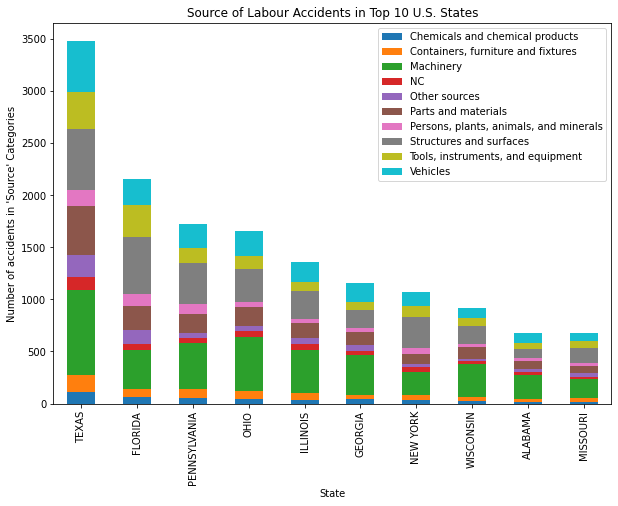

In [ ]:
dfCCn.drop('sum', axis=1).head(10).plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Source of Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Number of accidents in 'Source' Categories")

Text(0, 0.5, "Percentage of accidents in 'Source' Categories")

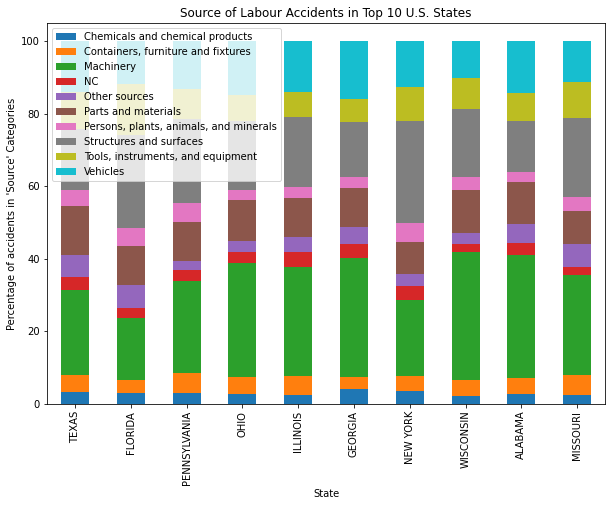

In [ ]:
dfCCnStacked = dfCCn.drop('sum', axis=1).head(10).apply(lambda x: x*100/sum(x), axis=1)
dfCCnStacked.plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Source of Labour Accidents in Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Source' Categories")

Text(0, 0.5, "Percentage of accidents in 'Source' Categories")

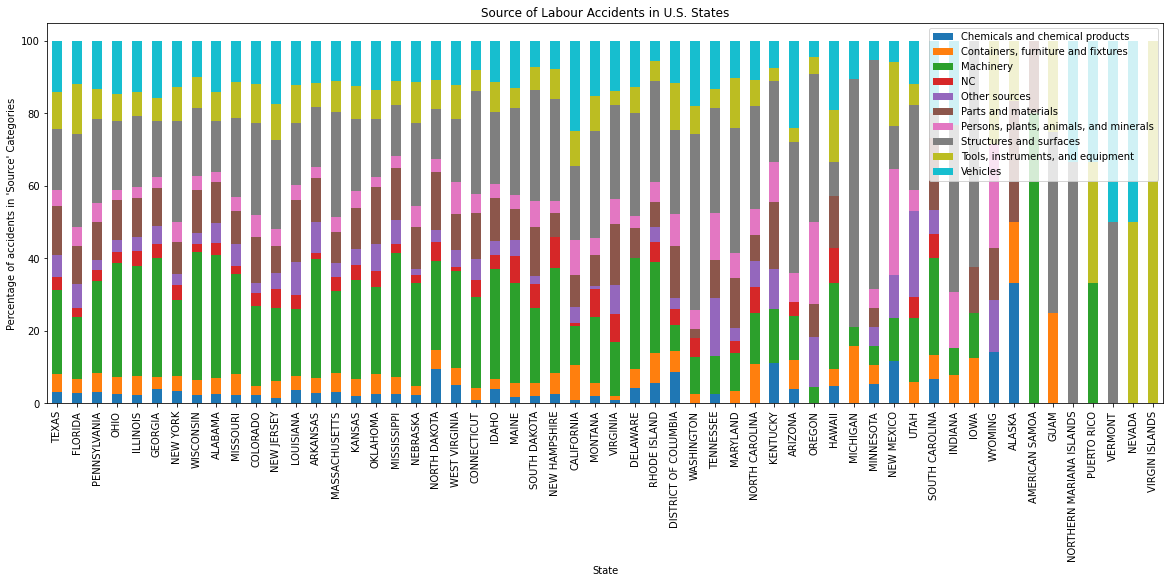

In [ ]:
dfCCnStacked = dfCCn.drop('sum', axis=1).apply(lambda x: x*100/sum(x), axis=1)
dfCCnStacked.plot(kind="bar", stacked=True, figsize=(20,7))
plt.title("Source of Labour Accidents in U.S. States")
plt.xlabel("State")
plt.ylabel("Percentage of accidents in 'Source' Categories")

###Εργατικά ατυχήματα στις ΗΠΑ (ο ίδιος χάρτης που έχω και παραπάνω)
Ο interactive χάρτης είναι [εδώ](https://www.datawrapper.de/_/CIjSe/)

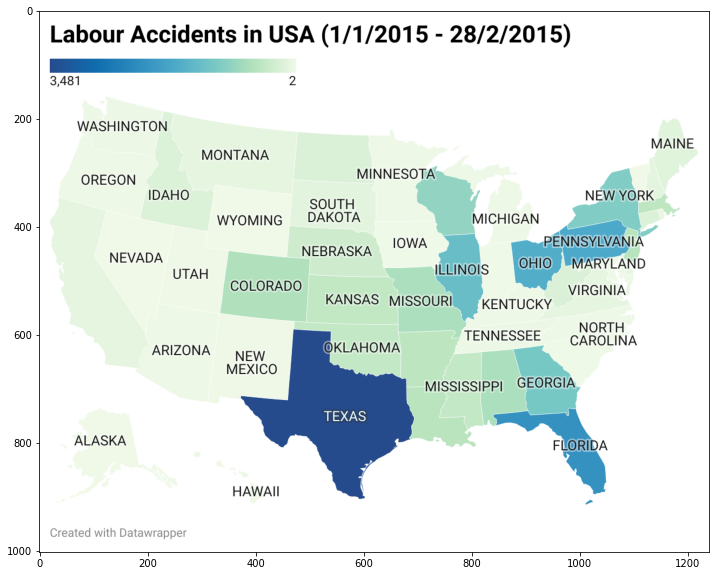

In [ ]:
# read the map image
mapimg = iio.imread("/content/gdrive/MyDrive/Colab Notebooks/EDDE2/accidents-us-map.png")
 
# write it in a new format
#iio.imwrite("g4g.jpg", img)

plt.figure(figsize = (12,12)) # διαμόρφωση του μεγέθους
plt.imshow(mapimg) # εκτύπωση του χάρτη

Το Texas δε μοιάζει με την Ινδία? Πλάκα θα'χει το Texas με την Ινδία να έχουν ίδιο αριθμό εργατικών ατυχημάτων αναλογικά με το εργατικό δυναμικό τους!!!